In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
file=r"C:\Users\Sean Lei\Desktop\data_data.csv"
datafile=pd.read_csv(file,encoding="utf8")
datafile.head()

,Number of employees,Is your employer a tech company?,Does your medical coverage include treatment of mental health?,Do you currently have a mental health disorder?,Do you know the options for mental health care available under your employer-provided health coverage?,Have you ever been diagnosed with a mental health disorder?,Have you had a mental health disorder in the past?,Do you have a family history of mental illness?,What is your age?,What is your gender?,...,"Eating Disorder (Anorexia, Bulimia, etc)",Attention Deficit Hyperactivity Disorder,"Personality Disorder (Borderline, Antisocial, Paranoid, etc)",Obsessive-Compulsive Disorder,Post traumatic Stress Disorder,Stress Response Syndromes,Dissociative Disorder,Substance Use Disorder,Addictive Disorder,Other
0,More than 1000,Yes,No,Possibly,Yes,No,Yes,Yes,57,Female,...,No,No,No,No,No,No,No,No,No,No
1,More than 1000,Yes,No,Yes,Yes,Yes,Yes,Yes,29,Male,...,No,No,No,No,Yes,No,No,No,No,No
2,25-Jun,No,No,No,Yes,No,No,Yes,46,Male,...,No,No,No,No,No,No,No,No,No,No
3,25-Jun,Yes,No,No,No,No,No,No,34,Male,...,No,No,No,No,No,No,No,No,No,No
4,26-100,Yes,No,Yes,Yes,Yes,Yes,Yes,29,Male,...,No,Yes,Yes,No,No,No,No,No,No,No


In [2]:
datafile.count()

Number of employees                                                                                       1173
Is your employer a tech company?                                                                          1173
Does your medical coverage include treatment of mental health?                                            1173
Do you currently have a mental health disorder?                                                           1173
Do you know the options for mental health care available under your employer-provided health coverage?    1173
Have you ever been diagnosed with a mental health disorder?                                               1173
Have you had a mental health disorder in the past?                                                        1173
Do you have a family history of mental illness?                                                           1173
What is your age?                                                                                         1173
W

In [3]:
#mental wellness by sample
sdatafile=pd.DataFrame(datafile["Do you currently have a mental health disorder?"].value_counts())
sdatafile


,Do you currently have a mental health disorder?
Yes,515
No,334
Possibly,226
Don't Know,98


In [4]:
# mental wellness by gender
gdatafile=datafile.groupby(["What is your gender?"])
gender=pd.DataFrame(gdatafile["Do you currently have a mental health disorder?"].value_counts())
gender=gender.rename(columns={"Do you currently have a mental health disorder?":"Disorder Count"})
gender.reset_index(inplace=True)
gender.head(10)

,What is your gender?,Do you currently have a mental health disorder?,Disorder Count
0,Female,Yes,200
1,Female,No,77
2,Female,Possibly,60
3,Female,Don't Know,18
4,Male,Yes,289
5,Male,No,250
6,Male,Possibly,157
7,Male,Don't Know,78
8,Other,Yes,26
9,Other,Possibly,9


In [5]:
# mental wellness by race
rdatafile=datafile.groupby("What is your race?")
race=pd.DataFrame(rdatafile["Do you currently have a mental health disorder?"].value_counts())
race=race.rename(columns={"Do you currently have a mental health disorder?":"Disorder Count"})
race.reset_index(inplace=True)
race.head()

,What is your race?,Do you currently have a mental health disorder?,Disorder Count
0,American Indian or Alaska Native,No,1
1,Asian,No,10
2,Asian,Yes,9
3,Asian,Possibly,3
4,Black or African American,Yes,7


In [6]:
# mental wellness by country
cdatafile=datafile.groupby("What country do you work in?")
country=pd.DataFrame(cdatafile["Do you currently have a mental health disorder?"].value_counts())
country=country.rename(columns={"Do you currently have a mental health disorder?":"Disorder Count"})
country.reset_index(inplace=True)
country.head()

,What country do you work in?,Do you currently have a mental health disorder?,Disorder Count
0,Argentina,Don't Know,1
1,Argentina,No,1
2,Australia,Yes,9
3,Australia,No,4
4,Australia,Possibly,3


In [7]:
# mental wellness by age
adatafile=datafile.groupby("What is your age?")
age=pd.DataFrame(adatafile["Do you currently have a mental health disorder?"].value_counts())
age=age.rename(columns={"Do you currently have a mental health disorder?":"Disorder Count"})
age.reset_index(inplace=True)
age["What is your age?"]=age["What is your age?"].replace(to_replace="No Answer",value=-1)
bin=[0,20,30,40,50,60,70,80]
age["Agegroup"]=pd.cut(age["What is your age?"].astype(float),bin)
age=age.groupby(["Agegroup","Do you currently have a mental health disorder?"])
age=pd.DataFrame(age["Disorder Count"].sum())
age.reset_index(inplace=True)
age

,Agegroup,Do you currently have a mental health disorder?,Disorder Count
0,"(0, 20]",No,1
1,"(0, 20]",Possibly,5
2,"(0, 20]",Yes,3
3,"(20, 30]",Don't Know,31
4,"(20, 30]",No,92
5,"(20, 30]",Possibly,81
6,"(20, 30]",Yes,177
7,"(30, 40]",Don't Know,48
8,"(30, 40]",No,154
9,"(30, 40]",Possibly,86


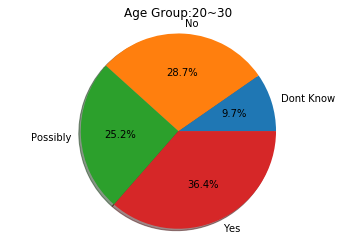

In [24]:
v1=[31,92,81,117]
l1=['Dont Know','No', 'Possibly', 'Yes']
plt.pie(v1,labels=l1,autopct="%1.1f%%",shadow=True)
plt.axis("equal")
plt.title("Age Group:20~30")
plt.show()

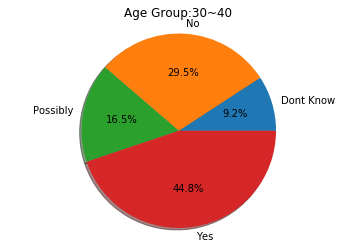

In [31]:
v2=[48,154,86,234]
l2=['Dont Know','No', 'Possibly', 'Yes']
plt.pie(v2,labels=l2,autopct="%1.1f%%",shadow=True)
plt.axis("equal")
plt.title("Age Group:30~40")
plt.show()

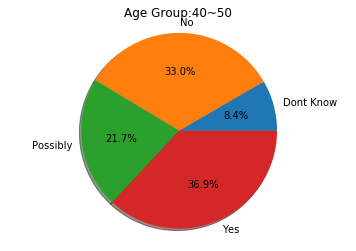

In [30]:
v3=[17,67,44,75]
l3=['Dont Know','No', 'Possibly', 'Yes']
plt.pie(v3,labels=l3,autopct="%1.1f%%",shadow=True)
plt.axis("equal")
plt.title("Age Group:40~50")
plt.show()

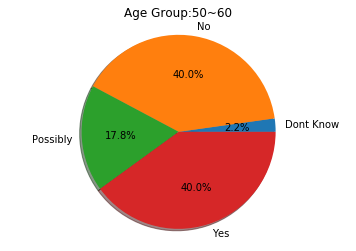

In [28]:
v4=[1,18,8,18]
l4=['Dont Know','No', 'Possibly', 'Yes']
plt.pie(v4,labels=l4,autopct="%1.1f%%",shadow=True)
plt.axis("equal")
plt.title("Age Group:50~60")
plt.show()

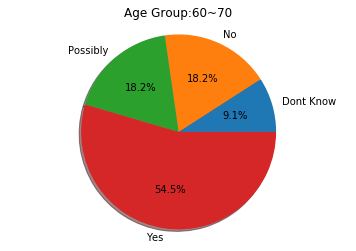

In [29]:
v5=[1,2,2,6]
l5=['Dont Know','No', 'Possibly', 'Yes']
plt.title("Age Group:60~70")
plt.pie(v5,labels=l5,autopct="%1.1f%%",shadow=True)
plt.axis("equal")
plt.show()

In [13]:
# Most prevalent disorders
headers=list(datafile.columns)
firstdisorderindex=headers.index("Anxiety Disorder (Generalized, Social, Phobia, etc)")
Disorders=headers[firstdisorderindex:]
Disorderfile=pd.DataFrame({"Disordercounts":["No","Yes"]})
Disorderfile.set_index("Disordercounts")
for disorder in Disorders:
    counts=list(datafile[disorder].value_counts())
    Disorderfile[disorder]=counts
Disorderfile



,Disordercounts,"Anxiety Disorder (Generalized, Social, Phobia, etc)","Mood Disorder (Depression, Bipolar Disorder, etc)","Psychotic Disorder (Schizophrenia, Schizoaffective, etc)","Eating Disorder (Anorexia, Bulimia, etc)",Attention Deficit Hyperactivity Disorder,"Personality Disorder (Borderline, Antisocial, Paranoid, etc)",Obsessive-Compulsive Disorder,Post traumatic Stress Disorder,Stress Response Syndromes,Dissociative Disorder,Substance Use Disorder,Addictive Disorder,Other
0,No,1018,660,1160,1136,1003,1128,1105,1068,1134,1159,1136,1142,1149
1,Yes,155,513,13,37,170,45,68,105,39,14,37,31,24


In [14]:
# disorder cause examination - Number of employees
nemp=datafile.groupby("Do you currently have a mental health disorder?")
nemp=pd.DataFrame(nemp["Number of employees"].value_counts())
nemp=nemp.rename(columns={"Number of employees":"Employee Count"})
nemp.reset_index(inplace=True)
nemp

,Do you currently have a mental health disorder?,Number of employees,Employee Count
0,Don't Know,More than 1000,23
1,Don't Know,100-500,22
2,Don't Know,26-100,20
3,Don't Know,No Answer,18
4,Don't Know,25-Jun,10
5,Don't Know,500-1000,5
6,No,26-100,76
7,No,100-500,74
8,No,More than 1000,55
9,No,25-Jun,53


In [15]:
# disorder cause examination - Does your medical coverage include treatment of mental health?
cov=datafile.groupby("Do you currently have a mental health disorder?")
cov=pd.DataFrame(cov["Does your medical coverage include treatment of mental health?"].value_counts())
cov=cov.rename(columns={"Does your medical coverage include treatment of mental health?":"Treatment Count"})
cov.reset_index(inplace=True)
cov

,Do you currently have a mental health disorder?,Does your medical coverage include treatment of mental health?,Treatment Count
0,Don't Know,No,88
1,Don't Know,yes,10
2,No,No,299
3,No,yes,35
4,Possibly,No,204
5,Possibly,yes,22
6,Yes,No,462
7,Yes,yes,53


In [16]:
# disorder cause examination - Does your medical coverage include treatment of mental health? - by country
coucov=datafile.groupby("What country do you work in?")
coucov=pd.DataFrame(coucov["Does your medical coverage include treatment of mental health?"].value_counts())
coucov=coucov.rename(columns={"Does your medical coverage include treatment of mental health?":"Treatment Count"})
coucov.reset_index(inplace=True)
coucov.head()

,What country do you work in?,Does your medical coverage include treatment of mental health?,Treatment Count
0,Argentina,No,2
1,Australia,No,11
2,Australia,yes,5
3,Austria,No,2
4,Austria,yes,1


In [17]:
# disorder cause examination - Do you know the options for mental health care available under your employer-provided health coverage?
opt=datafile.groupby("Do you currently have a mental health disorder?")
opt=pd.DataFrame(opt["Do you know the options for mental health care available under your employer-provided health coverage?"].value_counts())
opt=opt.rename(columns={"Do you know the options for mental health care available under your employer-provided health coverage?":"Count"})
opt.reset_index(inplace=True)
opt

,Do you currently have a mental health disorder?,Do you know the options for mental health care available under your employer-provided health coverage?,Count
0,Don't Know,No,78
1,Don't Know,Yes,20
2,No,No,240
3,No,Yes,94
4,Possibly,No,161
5,Possibly,Yes,65
6,Yes,No,262
7,Yes,Yes,253


In [18]:
# disorder cause examination - Have you ever been diagnosed with a mental health disorder?
his=datafile.groupby("Do you currently have a mental health disorder?")
his=pd.DataFrame(his["Have you ever been diagnosed with a mental health disorder?"].value_counts())
his=his.rename(columns={"Have you ever been diagnosed with a mental health disorder?":"Diagnose Count"})
his.reset_index(inplace=True)
his

,Do you currently have a mental health disorder?,Have you ever been diagnosed with a mental health disorder?,Diagnose Count
0,Don't Know,No,98
1,No,No,334
2,Possibly,No,226
3,Yes,Yes,503
4,Yes,No,12


In [19]:
# disorder cause examination - Have you had a mental health disorder in the past?
past=datafile.groupby("Do you currently have a mental health disorder?")
past=pd.DataFrame(past["Have you had a mental health disorder in the past?"].value_counts())
past=past.rename(columns={"Have you had a mental health disorder in the past?":"Count"})
past.reset_index(inplace=True)
past

,Do you currently have a mental health disorder?,Have you had a mental health disorder in the past?,Count
0,Don't Know,No,44
1,Don't Know,Don't Know,36
2,Don't Know,Possibly,13
3,Don't Know,Yes,5
4,No,No,236
5,No,Yes,50
6,No,Possibly,41
7,No,Don't Know,7
8,Possibly,Possibly,95
9,Possibly,Yes,65


In [20]:
# disorder cause examination - Do you have a family history of mental illness?
fam=datafile.groupby("Do you currently have a mental health disorder?")
fam=pd.DataFrame(fam["Do you have a family history of mental illness?"].value_counts())
fam=fam.rename(columns={"Do you have a family history of mental illness?":"Family History Count"})
fam.reset_index(inplace=True)
fam

,Do you currently have a mental health disorder?,Do you have a family history of mental illness?,Family History Count
0,Don't Know,No,39
1,Don't Know,I don't know,31
2,Don't Know,Yes,28
3,No,No,190
4,No,Yes,96
5,No,I don't know,48
6,Possibly,I don't know,88
7,Possibly,Yes,86
8,Possibly,No,52
9,Yes,Yes,337
